In [2]:
#!/usr/bin/env python3

# High-Amount Fraud Detection Based on Client Behavior


## Cargar el dataset y preparar el entorno


### Librerías + Config inicial


In [ ]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid")

# Mostrar más columnas en outputs
pd.set_option("display.max_columns", 100)

### Cargar dataset


In [4]:
# Ruta del archivo
data_path = "feature_engineering_work/dataset_feature_engineering.csv"

# Cargar el dataset
df = pd.read_csv(data_path)

# Ver las primeras filas
df.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,amt_month,amt_year,amt_month_shopping_net_spend,count_month_shopping_net,first_time_at_merchant,dist_between_client_and_merch,trans_month,trans_day,hour,year,times_shopped_at_merchant,times_shopped_at_merchant_year,times_shopped_at_merchant_month,times_shopped_at_merchant_day
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,4.97,4.97,0.0,0.0,True,78.773821,1,1,0,2019,5,4,2,1
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,107.23,107.23,0.0,0.0,True,30.216618,1,1,0,2019,4,4,1,1
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,220.11,220.11,0.0,0.0,True,108.102912,1,1,0,2019,4,3,1,1
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,45.00,45.00,0.0,0.0,True,95.685115,1,1,0,2019,1,1,1,1
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,41.96,41.96,0.0,0.0,True,77.702395,1,1,0,2019,6,1,1,1


## Exploratory Data Analysis (EDA)


### 1. Shape, types and basic info


In [5]:
print("Dimensiones del dataset:", df.shape)
print("\nTipos de datos:")
print(df.dtypes)
print("\nResumen de info del dataset:")
df.info()

Dimensiones del dataset: (1852394, 35)

Tipos de datos:
cc_num                               int64
merchant                            object
category                            object
amt                                float64
first                               object
last                                object
gender                              object
street                              object
city                                object
state                               object
zip                                  int64
lat                                float64
long                               float64
city_pop                             int64
job                                 object
dob                                 object
trans_num                           object
unix_time                            int64
merch_lat                          float64
merch_long                         float64
is_fraud                             int64
amt_month                          float6

### 2. Descripción estadística y columnas


In [6]:
print("\nDescripción estadística:")
print(df.describe())

print("\nListado de columnas:")
print(df.columns.tolist())


Descripción estadística:
             cc_num           amt           zip           lat          long  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   4.173860e+17  7.006357e+01  4.881326e+04  3.853931e+01 -9.022783e+01   
std    1.309115e+18  1.592540e+02  2.688185e+04  5.071470e+00  1.374789e+01   
min    6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01 -1.656723e+02   
25%    1.800429e+14  9.640000e+00  2.623700e+04  3.466890e+01 -9.679800e+01   
50%    3.521417e+15  4.745000e+01  4.817400e+04  3.935430e+01 -8.747690e+01   
75%    4.642255e+15  8.310000e+01  7.204200e+04  4.194040e+01 -8.015800e+01   
max    4.992346e+18  2.894890e+04  9.992100e+04  6.669330e+01 -6.795030e+01   

           city_pop     unix_time     merch_lat    merch_long      is_fraud  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   8.864367e+04  1.358674e+09  3.853898e+01 -9.022794e+01  5.210015e-03   
std    3.014876e+05  1.81

### 3. Valores nulos y duplicados


In [7]:
print("Valores nulos por columna:\n", df.isnull().sum())

print("\nValores únicos por columna:\n", df.nunique())

Valores nulos por columna:
 cc_num                             0
merchant                           0
category                           0
amt                                0
first                              0
last                               0
gender                             0
street                             0
city                               0
state                              0
zip                                0
lat                                0
long                               0
city_pop                           0
job                                0
dob                                0
trans_num                          0
unix_time                          0
merch_lat                          0
merch_long                         0
is_fraud                           0
amt_month                          0
amt_year                           0
amt_month_shopping_net_spend       0
count_month_shopping_net           0
first_time_at_merchant             0
dist_betwe

### 4. Distribución de la variable objetivo (is_fraud)


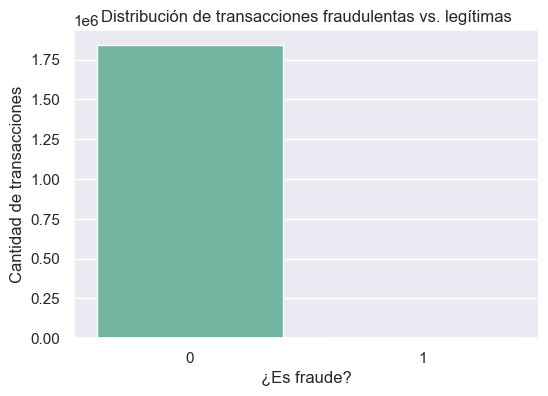

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x="is_fraud", data=df, palette="Set2")
plt.title("Distribución de transacciones fraudulentas vs. legítimas")
plt.xlabel("¿Es fraude?")
plt.ylabel("Cantidad de transacciones")
plt.show()

### 5. Distribución de montos de transacción


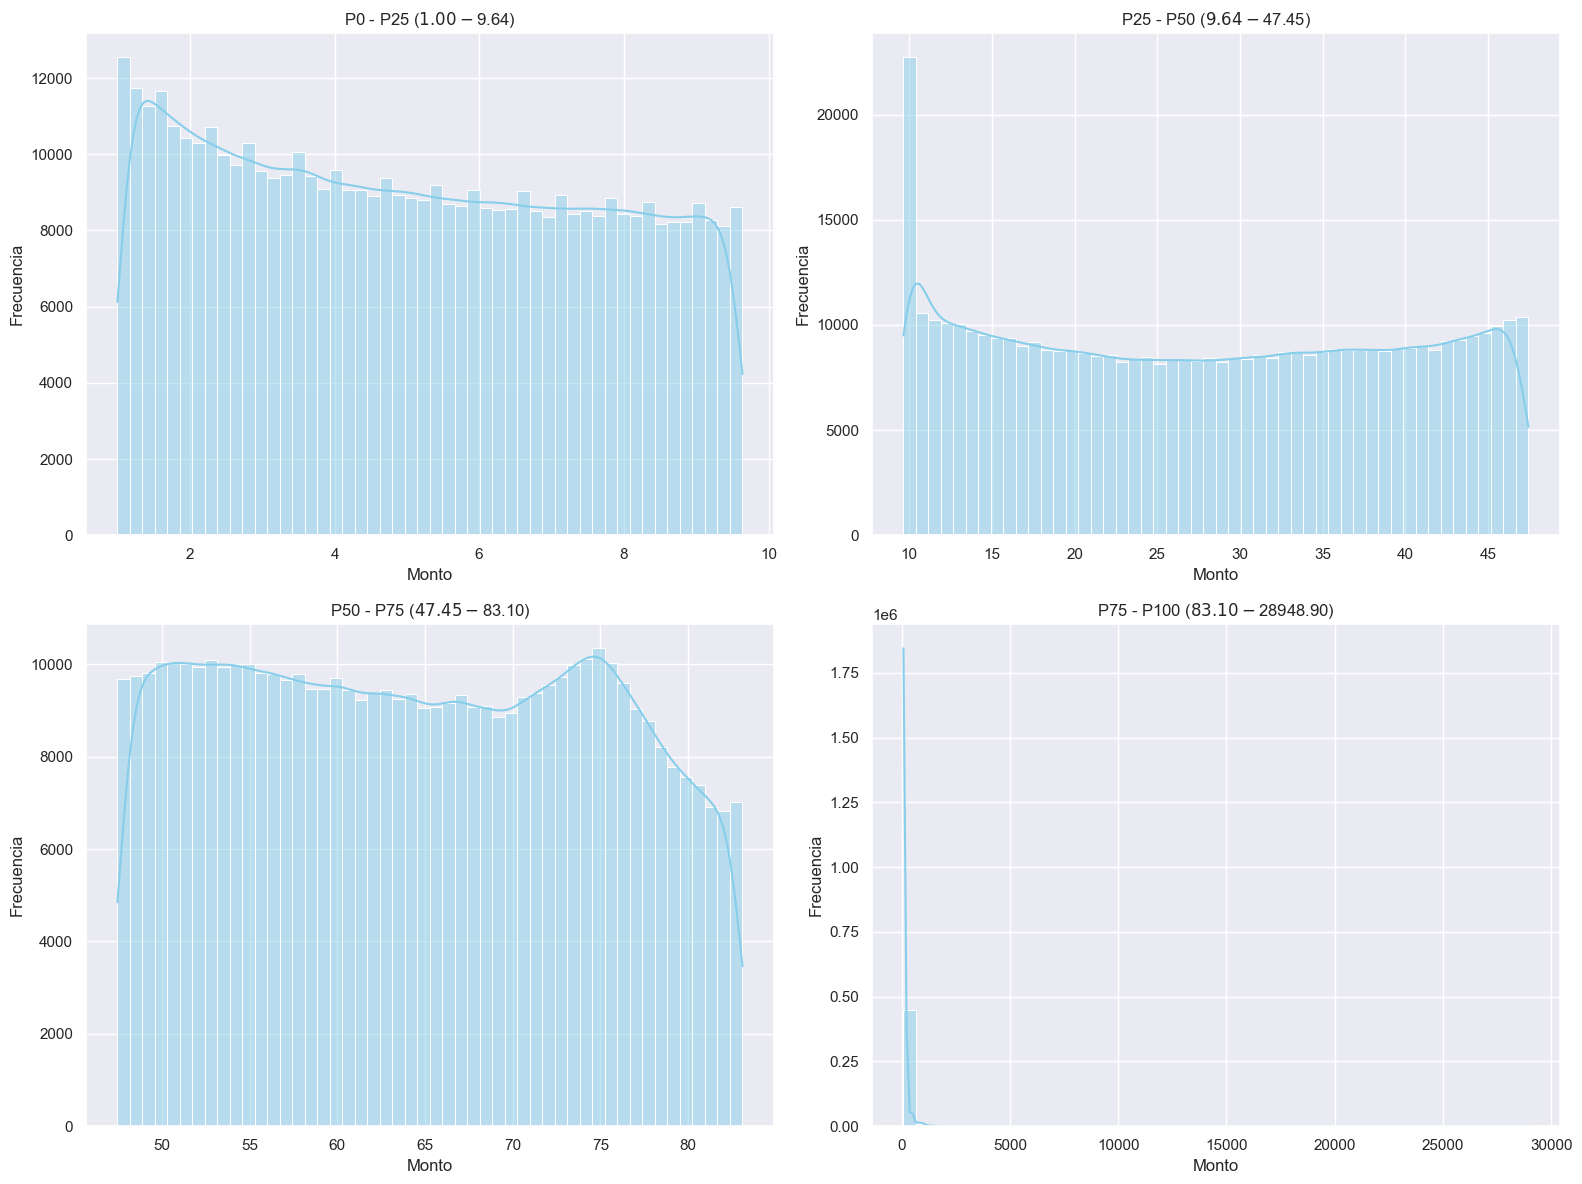

In [ ]:
# Calcular los percentiles para dividir en 4 grupos de 25%
p0 = df["amt"].quantile(0.00)
p25 = df["amt"].quantile(0.25)
p50 = df["amt"].quantile(0.50)
p75 = df["amt"].quantile(0.75)
p100 = df["amt"].quantile(1.00)

# Crear los rangos y sus títulos
amt_ranges = [
    (df[(df["amt"] >= p0) & (df["amt"] <= p25)], f"P0 - P25 (${p0:.2f} - ${p25:.2f})"),
    (
        df[(df["amt"] > p25) & (df["amt"] <= p50)],
        f"P25 - P50 (${p25:.2f} - ${p50:.2f})",
    ),
    (
        df[(df["amt"] > p50) & (df["amt"] <= p75)],
        f"P50 - P75 (${p50:.2f} - ${p75:.2f})",
    ),
    (
        df[(df["amt"] > p75) & (df["amt"] <= p100)],
        f"P75 - P100 (${p75:.2f} - ${p100:.2f})",
    ),
]

# Plot
plt.figure(figsize=(16, 12))

for idx, (subset, title) in enumerate(amt_ranges, 1):
    plt.subplot(2, 2, idx)
    sns.histplot(subset["amt"], bins=50, kde=True, color="skyblue")
    plt.title(title)
    plt.xlabel("Monto")
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

### 6. Relación entre monto y fraude


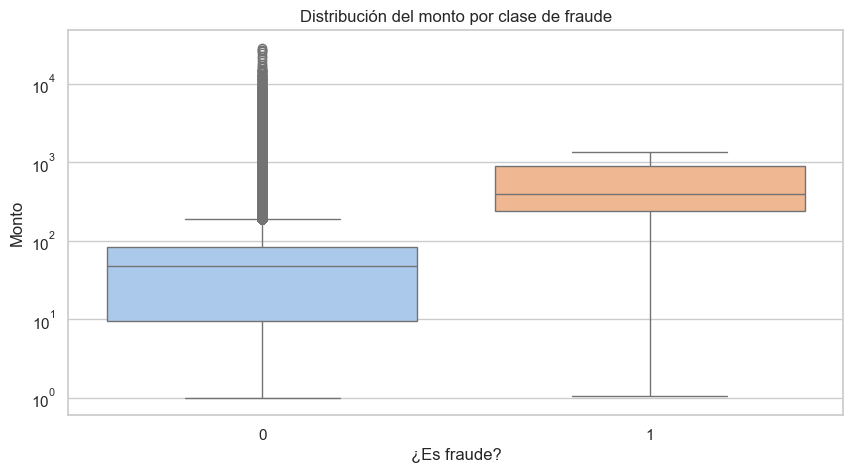

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="is_fraud", y="amt", data=df, palette="pastel")
plt.title("Distribución del monto por clase de fraude")
plt.xlabel("¿Es fraude?")
plt.ylabel("Monto")
plt.yscale("log")  # escala log para manejar outliers
plt.show()

### 7. Correlaciones entre variables numéricas


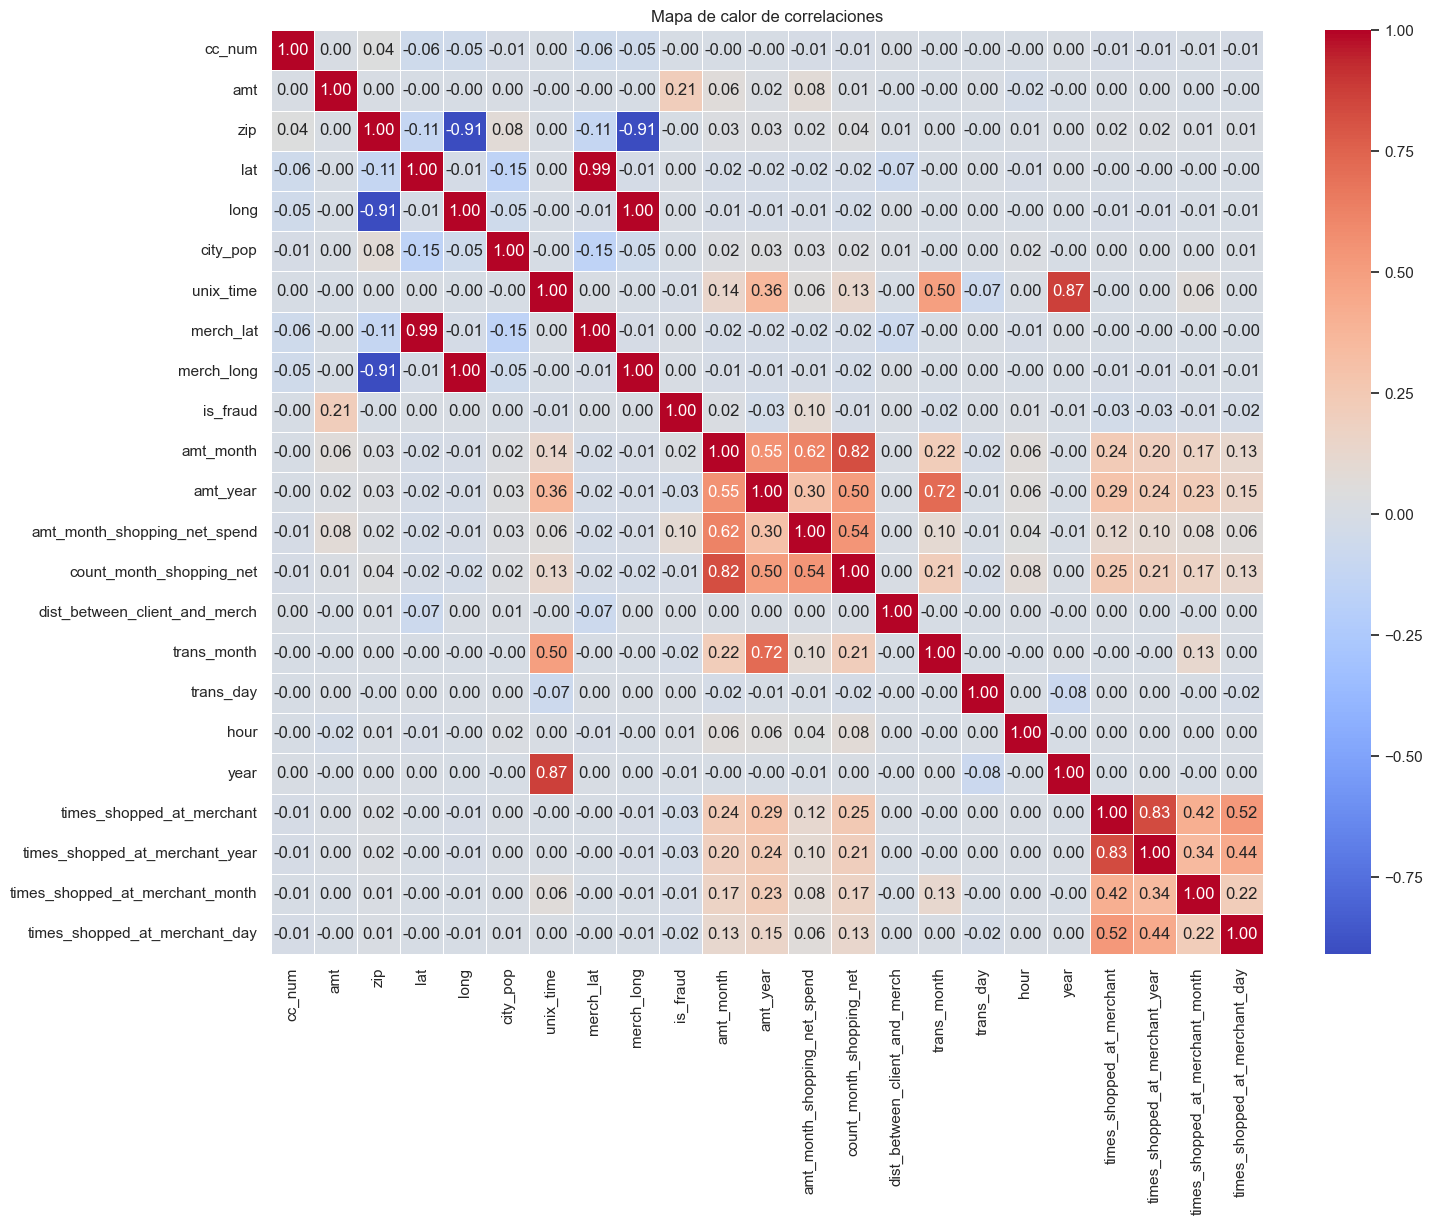

In [ ]:
plt.figure(figsize=(16, 12))

# Seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(include=[np.number])

# Generar el heatmap con las columnas numéricas
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor de correlaciones")
plt.show()

### 8. Análisis por cliente (cc_num)


In [ ]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output

# Crear columna auxiliar con nombre completo en mayúsculas
df["client_name"] = df["first"].str.upper() + " " + df["last"].str.upper()

# Crear opciones del dropdown: "cc_num - NOMBRE"
client_options = [
    (f"{row.cc_num} - {row.client_name}", row.cc_num)
    for row in df[["cc_num", "client_name"]].drop_duplicates().itertuples(index=False)
]

# Widget Dropdown
client_dropdown = widgets.Dropdown(
    options=client_options, description="Cliente:", disabled=False
)


# Función para mostrar análisis del cliente seleccionado
def analyze_client(cc_num_selected):
    clear_output(wait=True)
    # ❌ No mostrar el dropdown manualmente
    # display(client_dropdown)

    client_df = df[df["cc_num"] == cc_num_selected]

    print(f"🔍 Análisis para cliente: {cc_num_selected}")
    print(f"Nombre: {client_df['client_name'].iloc[0]}")
    print(f"Total de transacciones: {len(client_df)}")
    print(f"Transacciones fraudulentas: {client_df['is_fraud'].sum()}")

    # Estadísticas del monto
    print("\n📊 Estadísticas del monto (amt):")
    print(client_df["amt"].describe())

    # Gráficas para variables numéricas
    numerical_columns = client_df.select_dtypes(include=["int64", "float64"]).columns
    numerical_columns = [col for col in numerical_columns if col != "cc_num"]

    sns.set_style("darkgrid")
    plt.figure(figsize=(14, len(numerical_columns) * 3))

    for idx, feature in enumerate(numerical_columns, 1):
        plt.subplot(len(numerical_columns), 2, idx)
        sns.histplot(client_df[feature], kde=True)
        plt.title(f"{feature} | Skewness: {round(client_df[feature].skew(), 2)}")

    plt.tight_layout()
    plt.show()


# Asociar función al widget
widgets.interact(analyze_client, cc_num_selected=client_dropdown)

interactive(children=(Dropdown(description='Cliente:', options=(('2703186189652095 - JENNIFER BANKS', 27031861…

<function __main__.analyze_client(cc_num_selected)>

In [ ]:
import ipywidgets as widgets
import pandas as pd
import plotly.express as px

# Crear opciones para el dropdown: "cc_num - NOMBRE"
client_options = [
    (f"{row.cc_num} - {row.client_name}", row.cc_num)
    for row in df[["cc_num", "client_name"]].drop_duplicates().itertuples(index=False)
]

# Dropdown del cliente
client_dropdown = widgets.Dropdown(
    options=client_options, description="Cliente:", disabled=False
)


# Función para mostrar mapa interactivo
def show_client_map(cc_num_selected):
    # Filtrar transacciones del cliente
    client_df = df[df["cc_num"] == cc_num_selected].copy()

    if client_df.empty:
        print("No hay transacciones para este cliente.")
        return

    # Última ubicación del cliente
    client_lat = client_df["lat"].iloc[0]
    client_lon = client_df["long"].iloc[0]

    # Comercios únicos en los que el cliente ha comprado
    merchants_df = client_df[["merchant", "merch_lat", "merch_long"]].drop_duplicates()
    merchants_df = merchants_df.rename(
        columns={"merch_lat": "lat", "merch_long": "lon"}
    )
    merchants_df["tipo"] = "Comercio"
    merchants_df["tooltip"] = merchants_df["merchant"].apply(lambda m: f"Merchant: {m}")

    # Punto del cliente
    client_point = pd.DataFrame(
        [
            {
                "lat": client_lat,
                "lon": client_lon,
                "merchant": "Cliente",
                "tipo": "Cliente",
                "tooltip": "Ubicación del Cliente",
            }
        ]
    )

    # Unir data
    map_df = pd.concat([merchants_df, client_point], ignore_index=True)

    # Crear mapa interactivo
    fig = px.scatter_mapbox(
        map_df,
        lat="lat",
        lon="lon",
        color="tipo",
        hover_name="tooltip",
        zoom=10,
        center={"lat": client_lat, "lon": client_lon},
        mapbox_style="carto-positron",
        height=500,
    )

    fig.update_layout(title="📍 Ubicaciones del Cliente y Comercios")
    fig.show()


widgets.interact(show_client_map, cc_num_selected=client_dropdown)

interactive(children=(Dropdown(description='Cliente:', options=(('2703186189652095 - JENNIFER BANKS', 27031861…

<function __main__.show_client_map(cc_num_selected)>

In [38]:
import ipywidgets as widgets
from IPython.display import display

# Total de comercios únicos en todo el dataset
total_merchants = df["merchant"].nunique()

# Crear opciones para el dropdown del cliente
client_options = [
    (f"{row.cc_num} - {row.client_name}", row.cc_num)
    for row in df[["cc_num", "client_name"]].drop_duplicates().itertuples(index=False)
]

client_dropdown_merchants = widgets.Dropdown(
    options=client_options, description="Cliente:", disabled=False
)

# Output widget
merchant_output = widgets.Output()

# Función para mostrar el resumen
def merchant_coverage(change):
    with merchant_output:
        merchant_output.clear_output(wait=True)
        cc_num_selected = change['new']
        
        # Filtrar transacciones del cliente
        client_df = df[df["cc_num"] == cc_num_selected]

        # Comercios únicos donde ha comprado este cliente
        client_merchants = client_df["merchant"].nunique()
        uncovered_merchants = total_merchants - client_merchants

        print(f"🛒 Comercios únicos en el dataset: {total_merchants}")
        print(f"🙋‍♂️ Comercios visitados por el cliente {cc_num_selected}: {client_merchants}")
        print(f"❌ Comercios donde NO ha comprado: {uncovered_merchants}")

# Asociar la función al dropdown
client_dropdown_merchants.observe(merchant_coverage, names='value')

# Mostrar widgets
display(client_dropdown_merchants, merchant_output)

Dropdown(description='Cliente:', options=(('2703186189652095 - JENNIFER BANKS', 2703186189652095), ('630423337…

Output()

### 9. Análisis histórico por comercio (merchant)


In [ ]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Asegurar que la columna merchant está en string
df["merchant"] = df["merchant"].astype(str)

# Crear opciones del dropdown
merchant_options = sorted(df["merchant"].unique().tolist())
merchant_dropdown = widgets.Dropdown(
    options=merchant_options, description="Comercio:", disabled=False
)


# Función para analizar un comercio específico
def analyze_merchant(merchant_selected):
    clear_output(wait=True)

    merch_df = df[df["merchant"] == merchant_selected].copy()

    if merch_df.empty:
        print("No hay datos para este comercio.")
        return

    merch_df["trans_month"] = pd.to_numeric(merch_df["trans_month"], errors="coerce")
    merch_df["year"] = pd.to_numeric(merch_df["year"], errors="coerce")

    # Crear columna para agrupar por año y mes
    merch_df["year_month"] = pd.to_datetime(
        dict(year=merch_df.year, month=merch_df.trans_month, day=1)
    )

    # Agregaciones por mes
    monthly_summary = (
        merch_df.groupby("year_month")
        .agg({"amt": ["sum", "mean"], "trans_num": "count"})
        .reset_index()
    )

    monthly_summary.columns = ["year_month", "Total Amt", "Avg Amt", "Trans Count"]
    monthly_summary["year_month_str"] = monthly_summary["year_month"].dt.strftime(
        "%Y-%m"
    )

    # Plot
    fig, axes = plt.subplots(3, 1, figsize=(16, 12), sharex=False)

    sns.lineplot(
        data=monthly_summary,
        x="year_month",
        y="Total Amt",
        ax=axes[0],
        marker="o",
        color="steelblue",
    )
    axes[0].set_title(f"💰 Total gastado en {merchant_selected} por mes")

    sns.lineplot(
        data=monthly_summary,
        x="year_month",
        y="Avg Amt",
        ax=axes[1],
        marker="o",
        color="seagreen",
    )
    axes[1].set_title("📊 Promedio de gasto por transacción (mensual)")

    sns.barplot(
        data=monthly_summary,
        x="year_month_str",
        y="Trans Count",
        ax=axes[2],
        color="lightcoral",
    )
    axes[2].set_title("🔢 Número de transacciones por mes")
    axes[2].tick_params(axis="x", rotation=45)

    plt.tight_layout()
    plt.show()


# Asignar función al widget
widgets.interact(analyze_merchant, merchant_selected=merchant_dropdown)

interactive(children=(Dropdown(description='Comercio:', options=('fraud_Abbott-Rogahn', 'fraud_Abbott-Steuber'…

<function __main__.analyze_merchant(merchant_selected)>